In [1]:
import tensorflow as tf 
import pandas as pd 
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Data Processing

In [2]:
data_path = './archive/'

In [3]:
data = pd.read_csv(data_path + 'train.csv')
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
all_features = data.columns.to_list()
print(all_features)

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [5]:
remove_features = ['v.id', 'on road old', 'on road now']
features = [feature for feature in all_features if feature not in remove_features]
print(features)

['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [6]:
# sns.pairplot(data[features], diag_kind='kde')

In [7]:
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


## Convert data to tensor data

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data.shape)
print(tensor_data)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[6.720000e+02 6.792410e+05 8.984110e+05 3.000000e+00 6.503700e+04
  1.000000e+00 1.000000e+00 8.000000e+00 1.840000e+02 1.080000e+02
  6.900000e+01 5.287700e+05]
 [3.500000e+01 6.304890e+05 7.171820e+05 5.000000e+00 9.622600e+04
  1.000000e+00 9.000000e+00 8.000000e+00 1.910000e+02 1.010000e+02
  9.400000e+01 3.171190e+05]
 [4.340000e+02 5.244730e+05 7.722320e+05 3.000000e+00 1.248330e+05
  4.000000e+00 7.000000e+00 1.000000e+01 1.970000e+02 5.500000e+01
  8.200000e+01 1.580315e+05]
 [6.080000e+02 6.311480e+05 7.601710e+05 5.000000e+00 1.038270e+05
  5.000000e+00 6.000000e+00 1.100000e+01 1.510000e+02 7.200000e+01
  1.020000e+02 2.844625e+05]
 [6.050000e+02 6.382360e+05 7.938190e+05 3.000000e+00 5.169300e+04
  3.000000e+00 1.000000e+00 1.200000e+01 1.380000e+02 1.120000e+02
  1.070000e+02 5.095065e+05]], shape=(5, 12), dtype=float32)


In [10]:
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[3.00000e+00 6.50370e+04 1.00000e+00 1.00000e+00 8.00000e+00 1.84000e+02
  1.08000e+02 6.90000e+01]
 [5.00000e+00 9.62260e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.91000e+02
  1.01000e+02 9.40000e+01]
 [3.00000e+00 1.24833e+05 4.00000e+00 7.00000e+00 1.00000e+01 1.97000e+02
  5.50000e+01 8.20000e+01]
 [5.00000e+00 1.03827e+05 5.00000e+00 6.00000e+00 1.10000e+01 1.51000e+02
  7.20000e+01 1.02000e+02]
 [3.00000e+00 5.16930e+04 3.00000e+00 1.00000e+00 1.20000e+01 1.38000e+02
  1.12000e+02 1.07000e+02]], shape=(5, 8), dtype=float32)


In [11]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[528770. ]
 [317119. ]
 [158031.5]
 [284462.5]
 [509506.5]], shape=(5, 1), dtype=float32)


## Normalization
$$
\text{normalization} = \frac{X - \mu}{\sigma}, \quad \text{where $\mu$ = mean and $\sigma$ = std}
$$
```
Normalization()
```
Default axis = -1 means mean and std will be calculated based on columns, and then normalization will be performed along the columns.

In [12]:
normalizer = Normalization()
normalizer.adapt(x)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9084984 , -1.2094173 , -1.4178836 , -1.626617  , -1.6259731 ,
         0.8873506 ,  1.143725  , -1.6354392 ],
       [ 0.25549707, -0.13895048, -1.4178836 ,  1.2072111 , -1.6259731 ,
         1.250445  ,  0.8023728 , -0.44768804],
       [-0.9084984 ,  0.8428971 ,  0.7217796 ,  0.49875408, -0.7288843 ,
         1.5616688 , -1.4407988 , -1.0178086 ],
       [ 0.25549707,  0.12193055,  1.4350007 ,  0.14452557, -0.28033984,
        -0.8243802 , -0.61180055, -0.06760772],
       [-0.9084984 , -1.6674092 ,  0.00855854, -1.626617  ,  0.16820459,
        -1.4986984 ,  1.3387834 ,  0.1699425 ]], dtype=float32)>

In [13]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1)  # as we need only one output for current_price.
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


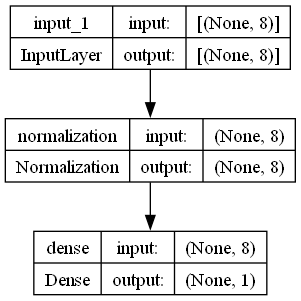

In [14]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## Training and Optimization

In [15]:
model.compile(
    optimizer=Adam(),
    loss=MeanAbsoluteError(),
    metrics = RootMeanSquaredError()
)

In [16]:
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100

32/32 [==============================] - 1s 3ms/step - loss: 308520.2500 - root_mean_squared_error: 333261.6875
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.1875 - root_mean_squared_error: 333261.6250
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.1250 - root_mean_squared_error: 333261.6250
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.0938 - root_mean_squared_error: 333261.5625
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.0625 - root_mean_squared_error: 333261.5625
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.0625 - root_mean_squared_error: 333261.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 308520.0625 - root_mean_squared_error: 333261.4688
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 308520.0000 - root_mean_squared_error: 333261.4375
Epoch 9

In [17]:
loss = history.history['loss']
root_mean_squared_error = history.history['root_mean_squared_error']
print(loss)
print(root_mean_squared_error)

[308520.25, 308520.1875, 308520.125, 308520.09375, 308520.0625, 308520.0625, 308520.0625, 308520.0, 308520.03125, 308519.96875, 308519.90625, 308519.875, 308519.84375, 308519.78125, 308519.78125, 308519.78125, 308519.71875, 308519.65625, 308519.6875, 308519.59375, 308519.625, 308519.5625, 308519.53125, 308519.5, 308519.46875, 308519.40625, 308519.4375, 308519.40625, 308519.3125, 308519.25, 308519.28125, 308519.21875, 308519.15625, 308519.1875, 308519.09375, 308519.125, 308519.09375, 308519.0, 308519.0, 308519.0, 308518.9375, 308518.90625, 308518.84375, 308518.875, 308518.84375, 308518.8125, 308518.78125, 308518.71875, 308518.71875, 308518.6875, 308518.65625, 308518.59375, 308518.59375, 308518.5625, 308518.5625, 308518.5, 308518.46875, 308518.40625, 308518.375, 308518.375, 308518.28125, 308518.25, 308518.21875, 308518.1875, 308518.15625, 308518.125, 308518.0625, 308518.09375, 308518.125, 308518.03125, 308517.90625, 308517.96875, 308517.90625, 308517.90625, 308517.875, 308517.78125, 3085

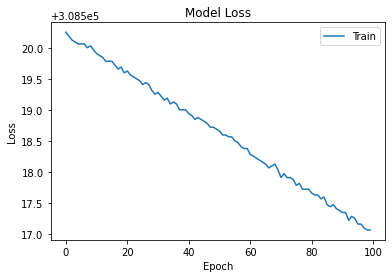

In [18]:
plt.plot(loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

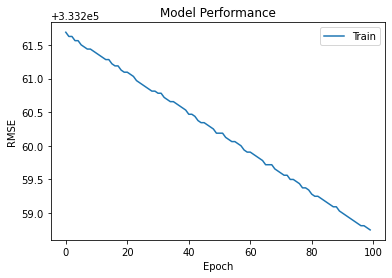

In [19]:
plt.plot(root_mean_squared_error)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(['Train'])
plt.show()

In [20]:
model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 308517.1250 - root_mean_squared_error: 333258.7188


[308517.125, 333258.71875]